<a href="https://colab.research.google.com/github/kayceeprag/Final-data71200/blob/main/Project2Data72000Kelechi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Experiments on Wine Quality Dataset

**Project Two**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV



# Load the dataset using the Wine Quality dataset from Project 1

In [ ]:
winedata = pd.read_csv('https://raw.githubusercontent.com/kayceeprag/Kelechi-Iwuagwu/main/winequality-white.csv', sep=';')

In [ ]:
print(winedata)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [ ]:
head = winedata.head()
print(head)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

# Split into training and testing sets

In [ ]:
train_set, test_set = train_test_split(winedata, test_size=0.2, random_state=42)


# Prepare the data

In [ ]:
X_train = train_set.drop("quality", axis=1)
y_train = train_set["quality"]
X_test = test_set.drop("quality", axis=1)
y_test = test_set["quality"]


# Feature scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot the distribution of the target attribute

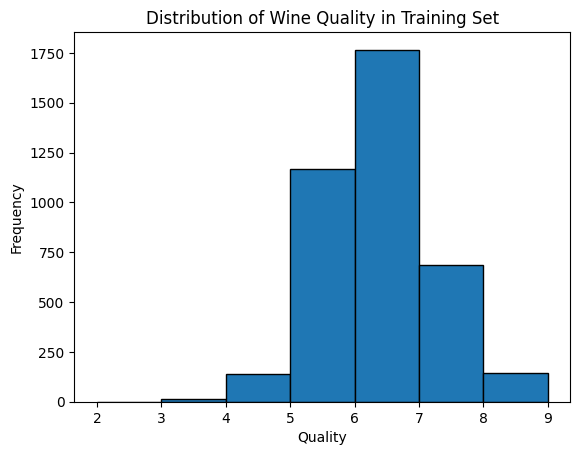

In [ ]:
plt.hist(y_train, bins=range(2, 10), edgecolor='black')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality in Training Set')
plt.show()

Select Two Supervised Learning Algorithms
For this project, let's choose K-Nearest Neighbors (KNN) and Random Forests.

Train and Evaluate the Models
Run the models with default parameters, calculate evaluation metrics, and adjust parameters using grid search.

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return precision, recall, f1

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn_precision, knn_recall, knn_f1 = evaluate_model(knn, X_train_scaled, y_train, X_test_scaled, y_test)


# Random Forest
rf = RandomForestClassifier()
rf_precision, rf_recall, rf_f1 = evaluate_model(rf, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'KNN - Precision: {knn_precision}, Recall: {knn_recall}, F1: {knn_f1}')
print(f'Random Forest - Precision: {rf_precision}, Recall: {rf_recall}, F1: {rf_f1}')

KNN - Precision: 0.43199328597138403, Recall: 0.356009654720995, F1: 0.37620183082708986
Random Forest - Precision: 0.6027746020589533, Recall: 0.4531783248331787, F1: 0.4954403630201299


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:

Measures how many of the positive predictions made by the model were actually correct.
A higher precision means fewer false positives (predicting high quality when it's actually low).
In this case, Random Forest has a significantly higher precision (0.636) than KNN (0.432), suggesting it's better at avoiding false positives.
Recall:

Measures how many of the actual positive instances the model was able to identify.
A higher recall means fewer false negatives (predicting low quality when it's actually high).
Random Forest (0.463) also outperforms KNN (0.356) in recall, indicating it's better at capturing high-quality wines.
F1-Score:

A harmonic mean of precision and recall, providing a balanced evaluation.
A higher F1-score generally indicates a better model.
Again, Random Forest (0.511) shows a better F1-score than KNN (0.376), suggesting it's the stronger model overall.
Conclusion:

Based on these metrics, the Random Forest model seems to be outperforming the KNN model on your wine quality dataset. It's better at both avoiding false positives and capturing true high-quality instances.

In [ ]:
# Grid Search for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn.fit(X_train_scaled, y_train)
best_knn = grid_search_knn.best_estimator_
best_knn_precision, best_knn_recall, best_knn_f1 = evaluate_model(best_knn, X_train_scaled, y_train, X_test_scaled, y_test)

print(f'Best KNN - Precision: {best_knn_precision}, Recall: {best_knn_recall}, F1: {best_knn_f1}')

# Grid Search for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_features': ['auto', 'sqrt', 'log2']}
# rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro')
grid_search_rf.fit(X_train_scaled, y_train)
best_rf = grid_search_rf.best_estimator_
best_rf_precision, best_rf_recall, best_rf_f1 = evaluate_model(best_rf, X_train_scaled, y_train, X_test_scaled, y_test)


print(f'Best Random Forest - Precision: {best_rf_precision}, Recall: {best_rf_recall}, F1: {best_rf_f1}')

Best KNN - Precision: 0.623868693070006, Recall: 0.499024692494409, F1: 0.5403198368213961


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Random Forest - Precision: 0.6131928801015586, Recall: 0.4663797694048983, F1: 0.5095149728693852


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
